# DATA PREPROCESSING

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')
data=pd.read_csv('Housing Prices Data.csv')

# TARGET VARIABLE

# OUTLIER

### Identifying Outlier

In [2]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

In [3]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

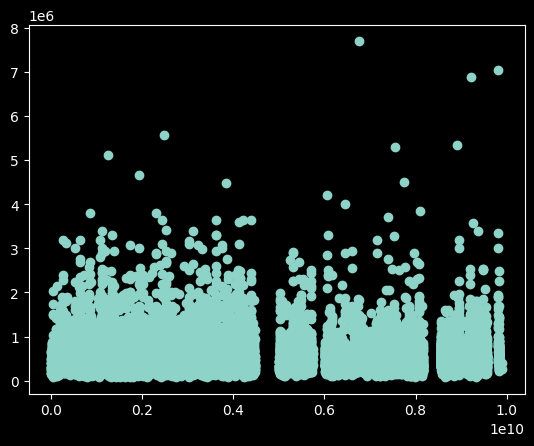

In [4]:
plt.scatter(x=data['ID'],y=data['Sale Price'])

In [5]:
import seaborn as sns

<Axes: xlabel='Sale Price'>

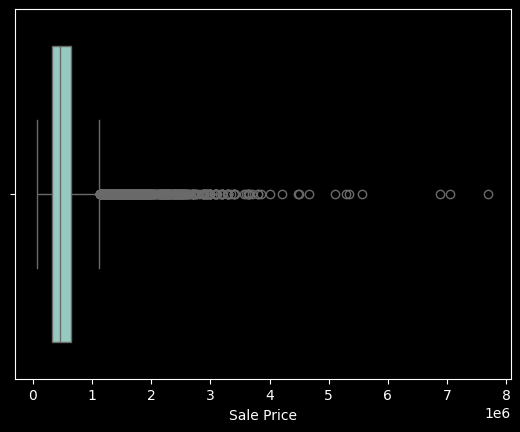

In [6]:
sns.boxplot(x=data['Sale Price'])

### Treating Outlier

In [7]:
q1=data['Sale Price'].quantile(.25)
q3=data['Sale Price'].quantile(.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

In [8]:
def limit_imputer(value):
    if value>upper_limit:
        return upper_limit
    elif value<lower_limit:
        return lower_limit
    else:
        return value

In [9]:
data['Sale Price']=data['Sale Price'].apply(limit_imputer)

### Results 

In [10]:
data['Sale Price'].describe()
#here can we see that our mean value is reduced but it is not closer to .50 because the data is not skewed properly

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

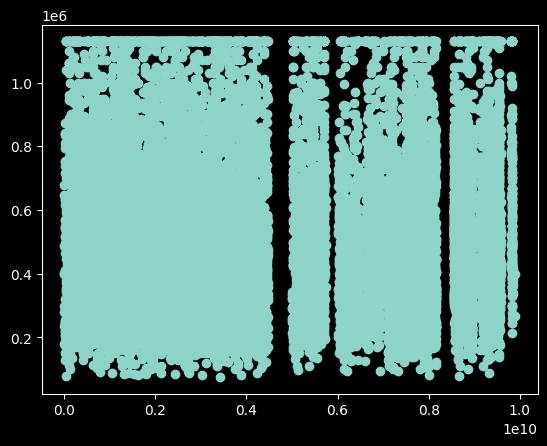

In [11]:
plt.scatter(x=data['ID'],y=data['Sale Price'])

<Axes: xlabel='Sale Price'>

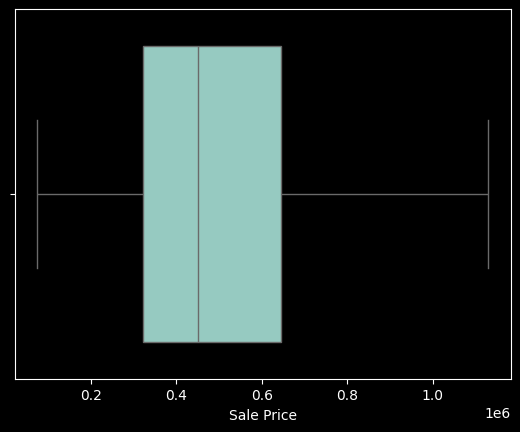

In [12]:
sns.boxplot(x=data['Sale Price'])

# MISSING VALUES

### Identifying Missing Values

In [13]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

### Treating Missing Value

In [15]:
data.dropna(inplace=True,axis=0,subset=['Sale Price'])

### Results

In [16]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House     

Text(0.5, 1.0, 'Histogram of Selling Price')

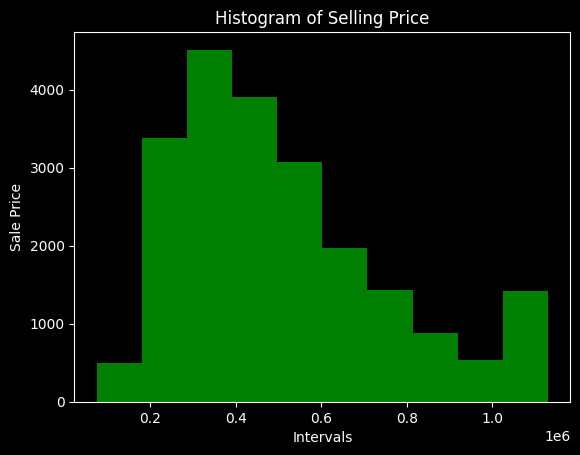

In [18]:
plt.hist(data['Sale Price'],bins=10,color='green')
plt.ylabel('Sale Price')
plt.xlabel('Intervals')
plt.title('Histogram of Selling Price')
#we get know that the data is skewed against lower value

# INDEPENDENT VARIABLE

# MISSING VALUES

### Identifying Missing Values

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House     

### Treating Missing Value

### For Quantitative column

In [20]:
quantitative_column=['No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)','Area of the House from Basement (in Sqft)','Latitude','Longitude','Living Area after Renovation (in Sqft)']

In [24]:
data['No of Bathrooms'].isnull().sum()

4

In [52]:
from sklearn.impute import SimpleImputer

In [53]:
impute=SimpleImputer(missing_values=np.nan,strategy='median')

In [54]:
data[quantitative_column]=impute.fit_transform(data[quantitative_column])

### Result

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House     

### For Categorical column

In [56]:
impute=SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [57]:
#data['Zipcode']=impute.fit_transform(data['Zipcode'])
#it will show an error that zipcode is a 1d array 
#it may be because of not using pandas dataframe,maybe pandas series is used

In [62]:
print(data['Zipcode'])

<bound method Series.unique of 0        False
1        False
2        False
3        False
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Name: Zipcode, Length: 21609, dtype: bool>


In [28]:
column=data['Zipcode'].values.reshape(-1,1)
column.shape
impute=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
data['Zipcode']=impute.fit_transform(column)

(21609, 1)

### Result

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House     

# VARIABLE TRANSFORMATION

### To make variable more usefull

### Zipcode

In [124]:
data['Zipcode']=data['Zipcode'].astype(object)

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House     

### No of Times Visited 

In [126]:
data['No of Times Visited'].unique()

array(['Zero', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [127]:
mapping = {'Zero':'0',
           'Once': '1',
           'Twice':'2',
           'Thrice':'3',
           'Four':'4'}
data['No of Times Visited']=data['No of Times Visited'].map(mapping)


In [128]:
data['No of Times Visited'].unique()

array(['0', '3', '4', '2', '1'], dtype=object)

In [129]:
data['No of Times Visited']=data['No of Times Visited'].astype('int64')

In [130]:
data['No of Times Visited'].dtype

dtype('int64')

In [131]:
np.unique(data['No of Times Visited'])

array([0, 1, 2, 3, 4], dtype=int64)

### Derive new variable from existing variables to make it more usefull

In [132]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14-Oct-17,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14-Dec-17,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15-Feb-16,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14-Dec-17,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15-Feb-16,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [133]:
data['Ever Renovated']=np.where(data['Renovated Year']==0,'No','Yes')

In [134]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated
0,7129300520,14-Oct-17,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,No
1,6414100192,14-Dec-17,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes
2,5631500400,15-Feb-16,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,No
3,2487200875,14-Dec-17,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,No
4,1954400510,15-Feb-16,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,No


In [135]:
data['Purchase Year']=pd.DatetimeIndex(data['Date House was Sold']).year

In [136]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Purchase Year
0,7129300520,14-Oct-17,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,No,2017
1,6414100192,14-Dec-17,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes,2017
2,5631500400,15-Feb-16,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,No,2016
3,2487200875,14-Dec-17,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,No,2017
4,1954400510,15-Feb-16,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,No,2016


In [137]:
data['Years Since Renovation']=np.where(data['Ever Renovated']=='Yes',abs(data['Purchase Year']-data['Renovated Year']),0)

In [138]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Purchase Year,Years Since Renovation
0,7129300520,14-Oct-17,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,63,0,98178.0,47.5112,-122.257,1340.0,5650,No,2017,0
1,6414100192,14-Dec-17,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes,2017,26
2,5631500400,15-Feb-16,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,85,0,98028.0,47.7379,-122.233,2720.0,8062,No,2016,0
3,2487200875,14-Dec-17,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,53,0,98136.0,47.5208,-122.393,1360.0,5000,No,2017,0
4,1954400510,15-Feb-16,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,31,0,98074.0,47.6168,-122.045,1800.0,7503,No,2016,0


In [139]:
data.drop(columns=['ID','Purchase Year','Date House was Sold','Renovated Year'],inplace=True)

In [140]:
data.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


# CORRELATION 

### Among Categorical Variable

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  float64
 4   Lot Area (in Sqft)                         21609 non-null  float64
 5   No of Floors                               21609 non-null  float64
 6   Waterfront View                            21609 non-null  object 
 7   No of Times Visited                        21609 non-null  int64  
 8   Condition of the House                     21609 non-null  object 
 9   Overall Grade                              21609 non-null  int64  
 10  Area of the House from Base

In [142]:
data['Condition of the House'].value_counts()

Condition of the House
Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: count, dtype: int64

<Axes: xlabel='Condition of the House'>

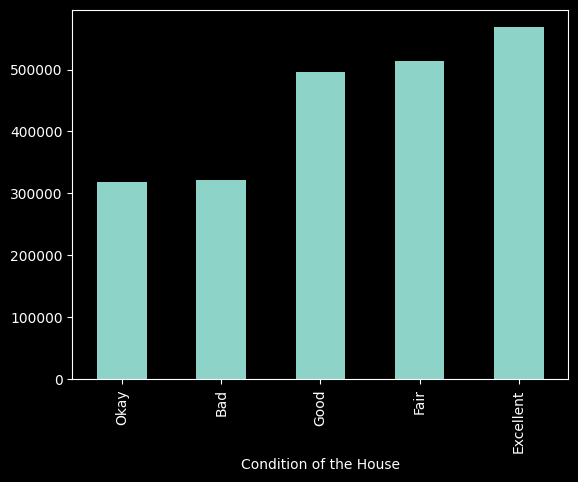

In [143]:
data.groupby('Condition of the House')['Sale Price'].mean().sort_values().plot(kind='bar')

<Axes: xlabel='Waterfront View'>

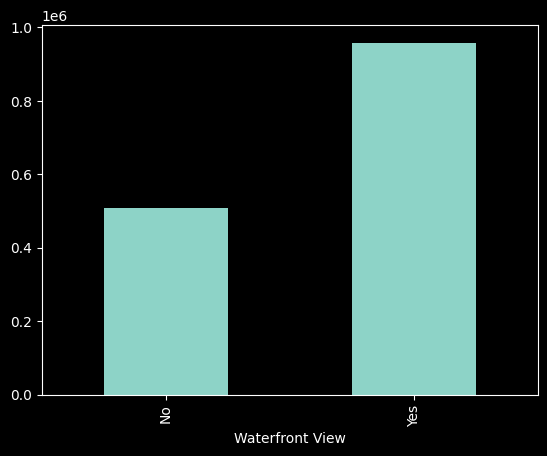

In [144]:
data.groupby('Waterfront View')['Sale Price'].mean().sort_values().plot(kind='bar')

<Axes: xlabel='Ever Renovated'>

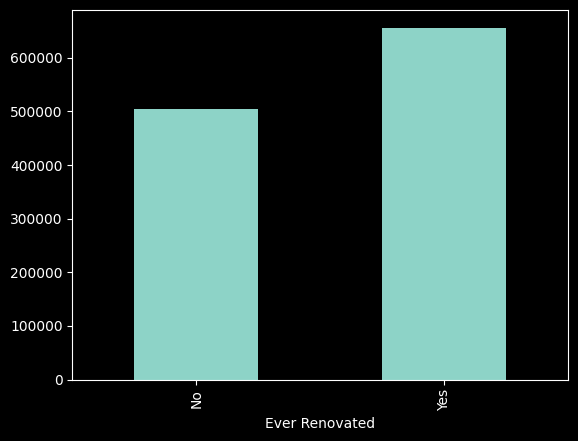

In [145]:
data.groupby('Ever Renovated')['Sale Price'].mean().sort_values().plot(kind='bar')

<Axes: xlabel='Zipcode'>

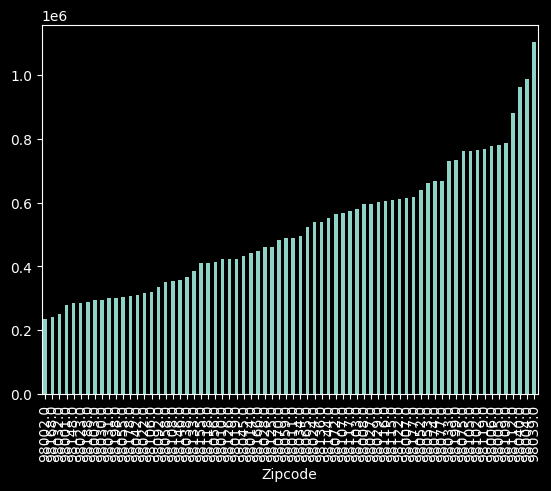

In [146]:
data.groupby('Zipcode')['Sale Price'].mean().sort_values().plot(kind='bar')

# ANOVA

In [147]:
from statsmodels.formula.api import ols
import statsmodels.api as sm 

In [148]:
data=data.rename(columns={'Sale Price':'Sale_Price'})
data=data.rename(columns={'Waterfront View':'Waterfront_View'})
data=data.rename(columns={'Condition of the House':'Condition_of_the_House'})
data=data.rename(columns={'Ever Renovated':'Ever_Renovated'})

In [149]:
mod=ols('Sale_Price ~ Condition_of_the_House',data=data).fit()
Anova_Table=sm.stats.anova_lm(mod,typ=2)
print(Anova_Table)
#F value is large and p value is less than 0.05 so this mean diffrence is avg mean values is genuine
#means categorical variable do have an impact on target variable

                              sum_sq       df         F        PR(>F)
Condition_of_the_House  1.441831e+13      4.0  58.25563  5.447605e-49
Residual                1.336752e+15  21604.0       NaN           NaN


In [150]:
mod=ols('Sale_Price ~ Waterfront_View',data=data).fit()
Anova_Table=sm.stats.anova_lm(mod,typ=2)
print(Anova_Table)

                       sum_sq       df           F         PR(>F)
Waterfront_View  3.283737e+13      1.0  538.192683  1.275558e-117
Residual         1.318333e+15  21607.0         NaN            NaN


In [151]:
mod=ols('Sale_Price ~ Ever_Renovated',data=data).fit()
Anova_Table=sm.stats.anova_lm(mod,typ=2)
print(Anova_Table)

                      sum_sq       df           F        PR(>F)
Ever_Renovated  1.998463e+13      1.0  324.378469  5.419055e-72
Residual        1.331185e+15  21607.0         NaN           NaN


In [152]:
mod=ols('Sale_Price ~ Zipcode',data=data).fit()
Anova_Table=sm.stats.anova_lm(mod,typ=2)
print(Anova_Table)

                sum_sq       df           F  PR(>F)
Zipcode   6.859657e+14     69.0  321.902033     0.0
Residual  6.652044e+14  21539.0         NaN     NaN


# DUMMY VARIABLES

In [153]:
#used to convert categorical variable to numerical variable to use in regression

In [154]:
data=pd.get_dummies(data,columns=['Condition_of_the_House','Waterfront_View','Ever_Renovated'],drop_first=True)

In [155]:
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Waterfront_View_Yes,Ever_Renovated_Yes
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,-122.257,1340.0,5650,0,False,True,False,False,False,False
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,-122.319,1690.0,7639,26,False,True,False,False,False,True
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,-122.233,2720.0,8062,0,False,True,False,False,False,False
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,-122.393,1360.0,5000,0,True,False,False,False,False,False
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,-122.045,1800.0,7503,0,False,True,False,False,False,False


### Binning

In [156]:
#used for variables having more than 20 values in it like zipcode

In [157]:
Zip_table=data.groupby('Zipcode').agg({'Sale_Price':'mean'}).sort_values('Sale_Price',ascending=True)

In [158]:
Zip_table.head()

,Sale_Price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [159]:
Zip_table['Zipcode_Group']=pd.cut(Zip_table['Sale_Price'],bins=10,labels=['Zipcode_Group0',
                                                         'Zipcode_Group1',
                                                         'Zipcode_Group2',
                                                         'Zipcode_Group3',
                                                         'Zipcode_Group4',
                                                         'Zipcode_Group5',
                                                         'Zipcode_Group6',
                                                         'Zipcode_Group7',
                                                         'Zipcode_Group8',
                                                         'Zipcode_Group9'],
                                                         include_lowest=True)
Zip_table=Zip_table.drop(columns="Sale_Price")

In [160]:
Zip_table

,Zipcode_Group
Zipcode,
98002.0,Zipcode_Group0
98168.0,Zipcode_Group0
98032.0,Zipcode_Group0
98001.0,Zipcode_Group0
98148.0,Zipcode_Group0
...,...
98109.0,Zipcode_Group6
98112.0,Zipcode_Group7
98040.0,Zipcode_Group8


In [161]:
data=pd.merge(data,Zip_table,left_on='Zipcode',how='left',right_index=True)

In [162]:
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Waterfront_View_Yes,Ever_Renovated_Yes,Zipcode_Group
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,1340.0,5650,0,False,True,False,False,False,False,Zipcode_Group0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,1690.0,7639,26,False,True,False,False,False,True,Zipcode_Group2
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,2720.0,8062,0,False,True,False,False,False,False,Zipcode_Group2
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,1360.0,5000,0,True,False,False,False,False,False,Zipcode_Group3
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,1800.0,7503,0,False,True,False,False,False,False,Zipcode_Group4


In [163]:
data=pd.get_dummies(data,columns=['Zipcode_Group'],drop_first=True)

In [164]:
data.drop(columns='Zipcode',inplace=True)

In [165]:
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Ever_Renovated_Yes,Zipcode_Group_Zipcode_Group1,Zipcode_Group_Zipcode_Group2,Zipcode_Group_Zipcode_Group3,Zipcode_Group_Zipcode_Group4,Zipcode_Group_Zipcode_Group5,Zipcode_Group_Zipcode_Group6,Zipcode_Group_Zipcode_Group7,Zipcode_Group_Zipcode_Group8,Zipcode_Group_Zipcode_Group9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,False,False,False,False,False,False,False,False,False,False
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,True,False,True,False,False,False,False,False,False,False
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,False,False,True,False,False,False,False,False,False,False
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,False,False,False,True,False,False,False,False,False,False
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,False,False,False,False,True,False,False,False,False,False


In [166]:
#Just tranforming variable to int and float from bool for applying in linear regression model
data[['Condition_of_the_House_Excellent','Condition_of_the_House_Fair','Condition_of_the_House_Good','Condition_of_the_House_Okay','Waterfront_View_Yes','Ever_Renovated_Yes','Zipcode_Group_Zipcode_Group1','Zipcode_Group_Zipcode_Group2','Zipcode_Group_Zipcode_Group3','Zipcode_Group_Zipcode_Group4','Zipcode_Group_Zipcode_Group5','Zipcode_Group_Zipcode_Group6','Zipcode_Group_Zipcode_Group7','Zipcode_Group_Zipcode_Group8','Zipcode_Group_Zipcode_Group9']]=data[['Condition_of_the_House_Excellent','Condition_of_the_House_Fair','Condition_of_the_House_Good','Condition_of_the_House_Okay','Waterfront_View_Yes','Ever_Renovated_Yes','Zipcode_Group_Zipcode_Group1','Zipcode_Group_Zipcode_Group2','Zipcode_Group_Zipcode_Group3','Zipcode_Group_Zipcode_Group4','Zipcode_Group_Zipcode_Group5','Zipcode_Group_Zipcode_Group6','Zipcode_Group_Zipcode_Group7','Zipcode_Group_Zipcode_Group8','Zipcode_Group_Zipcode_Group9']].astype('int64')

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale_Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  float64
 4   Lot Area (in Sqft)                         21609 non-null  float64
 5   No of Floors                               21609 non-null  float64
 6   No of Times Visited                        21609 non-null  int64  
 7   Overall Grade                              21609 non-null  int64  
 8   Area of the House from Basement (in Sqft)  21609 non-null  float64
 9   Basement Area (in Sqft)                    21609 non-null  int64  
 10  Age of House (in Years)    

# LINEAR REGRESSION

# SCALING

In [168]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Y=data['Sale_Price']
X=scaler.fit_transform(data.drop(columns='Sale_Price'))
X=pd.DataFrame(data=X,columns=data.drop(columns='Sale_Price').columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Ever_Renovated_Yes,Zipcode_Group_Zipcode_Group1,Zipcode_Group_Zipcode_Group2,Zipcode_Group_Zipcode_Group3,Zipcode_Group_Zipcode_Group4,Zipcode_Group_Zipcode_Group5,Zipcode_Group_Zipcode_Group6,Zipcode_Group_Zipcode_Group7,Zipcode_Group_Zipcode_Group8,Zipcode_Group_Zipcode_Group9
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,...,-0.210155,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,...,4.758385,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,...,-0.210155,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,...,-0.210155,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,...,-0.210155,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


# CHECKING AND REMOVING MULTICOLLINEARITY

In [169]:
X.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Ever_Renovated_Yes,Zipcode_Group_Zipcode_Group1,Zipcode_Group_Zipcode_Group2,Zipcode_Group_Zipcode_Group3,Zipcode_Group_Zipcode_Group4,Zipcode_Group_Zipcode_Group5,Zipcode_Group_Zipcode_Group6,Zipcode_Group_Zipcode_Group7,Zipcode_Group_Zipcode_Group8,Zipcode_Group_Zipcode_Group9
No of Bedrooms,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,...,0.018573,-0.010603,-0.039342,-0.074129,0.024433,0.019420,0.090177,0.016725,0.102736,0.035694
No of Bathrooms,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,...,0.050282,-0.032810,-0.081460,-0.034459,0.084054,0.052804,0.123256,0.037746,0.110012,0.067871
Flat Area (in Sqft),0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,...,0.055111,-0.058817,-0.063005,-0.078761,0.086139,0.075978,0.160045,0.051211,0.169576,0.090253
Lot Area (in Sqft),0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,...,0.007736,0.023684,0.052103,-0.041112,-0.012050,0.015320,-0.023270,-0.027419,-0.007025,0.002671
No of Floors,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,...,0.006297,-0.003385,-0.067904,0.079211,0.071786,0.009203,0.069857,0.064981,-0.008633,0.005868
No of Times Visited,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,...,0.104051,-0.065000,0.004754,0.005905,0.003509,0.024801,0.068144,-0.012548,0.065335,0.012923
Overall Grade,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,...,0.010010,-0.075495,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638
Area of the House from Basement (in Sqft),0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,...,0.023202,-0.028348,-0.052418,-0.090628,0.086640,0.062267,0.129310,0.029477,0.134021,0.087398
Basement Area (in Sqft),0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,...,0.070969,-0.069149,-0.032302,0.006247,0.016422,0.040662,0.090206,0.051128,0.101159,0.023775
Age of House (in Years),-0.154113,-0.505954,-0.318146,-0.053119,-0.489244,0.053395,-0.456711,-0.423848,0.133072,1.000000,...,0.225182,-0.070111,0.022094,0.095882,-0.056974,-0.009965,0.025718,0.101486,-0.002705,-0.002492


In [170]:
# pair of independent variables corr >0.5
k=X.corr()
# List Compression
z=[[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] >abs(0.5))&(i!=j)]
z,len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 

# CALCULATING VIF

In [171]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=X
# calc vif for every column by list compression
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF

No of Bedrooms                                  1.639470
No of Bathrooms                                 3.374992
Flat Area (in Sqft)                          1481.681648
Lot Area (in Sqft)                              2.108079
No of Floors                                    2.127787
No of Times Visited                             1.432385
Overall Grade                                   2.967448
Area of the House from Basement (in Sqft)    1205.549115
Basement Area (in Sqft)                       345.465009
Age of House (in Years)                         2.629539
Latitude                                        2.471442
Longitude                                       1.672691
Living Area after Renovation (in Sqft)          3.068139
Lot Area after Renovation (in Sqft)             2.144347
Years Since Renovation                          2.788098
Condition_of_the_House_Excellent               53.578111
Condition_of_the_House_Fair                   166.129930
Condition_of_the_House_Good    

In [172]:
VIF[VIF == VIF.max()].index[0]

'Flat Area (in Sqft)'

In [173]:
def MC_remover(data):
    vif=pd.Series([variance_inflation_factor(data.values,i) for i in range(data.shape[1])],index=data.columns)
    if vif.max() > 5:
        print(vif[vif == vif.max()].index[0],'has been removed.')
        data=data.drop(columns=[vif[vif == vif.max()].index[0]])
        return data
    else:
        print('No Multicollinearity is left.')
        return data

In [174]:
for i in range(7):
    vif_data=MC_remover(vif_data)

vif_data.head()

Flat Area (in Sqft) has been removed.
Condition_of_the_House_Fair has been removed.
No Multicollinearity is left.
No Multicollinearity is left.
No Multicollinearity is left.
No Multicollinearity is left.
No Multicollinearity is left.


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,...,Ever_Renovated_Yes,Zipcode_Group_Zipcode_Group1,Zipcode_Group_Zipcode_Group2,Zipcode_Group_Zipcode_Group3,Zipcode_Group_Zipcode_Group4,Zipcode_Group_Zipcode_Group5,Zipcode_Group_Zipcode_Group6,Zipcode_Group_Zipcode_Group7,Zipcode_Group_Zipcode_Group8,Zipcode_Group_Zipcode_Group9
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,...,-0.210155,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,...,4.758385,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,...,-0.210155,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,...,-0.210155,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,...,-0.210155,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


In [175]:
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF,len(vif_data.columns)

(No of Bedrooms                               1.638990
 No of Bathrooms                              3.373805
 Lot Area (in Sqft)                           2.107495
 No of Floors                                 2.127703
 No of Times Visited                          1.432363
 Overall Grade                                2.956967
 Area of the House from Basement (in Sqft)    4.580042
 Basement Area (in Sqft)                      1.974981
 Age of House (in Years)                      2.626504
 Latitude                                     2.471343
 Longitude                                    1.672667
 Living Area after Renovation (in Sqft)       3.063886
 Lot Area after Renovation (in Sqft)          2.144068
 Years Since Renovation                       2.788064
 Condition_of_the_House_Excellent             1.206487
 Condition_of_the_House_Good                  1.251488
 Condition_of_the_House_Okay                  1.025386
 Waterfront_View_Yes                          1.208288
 Ever_Reno

# TRAIN AND TEST TEST

In [176]:
x=vif_data
y=data['Sale_Price']

In [177]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((15126, 28), (6483, 28), (15126,), (6483,))

# LINEAR REGRESSION

In [178]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [179]:
predictions=lr.predict(x_test)
lr.score(x_test,y_test)

0.8461987715586199

# RESIDUALS

In [180]:
residuals=predictions-y_test
residual_table=pd.DataFrame({'residuals':residuals,
                             'predictions':predictions})
residual_table=residual_table.sort_values(by='predictions')

In [181]:
z=[i for i in range(int(residual_table['predictions'].max()))]
k=[0 for i in range(int(residual_table['predictions'].max()))]

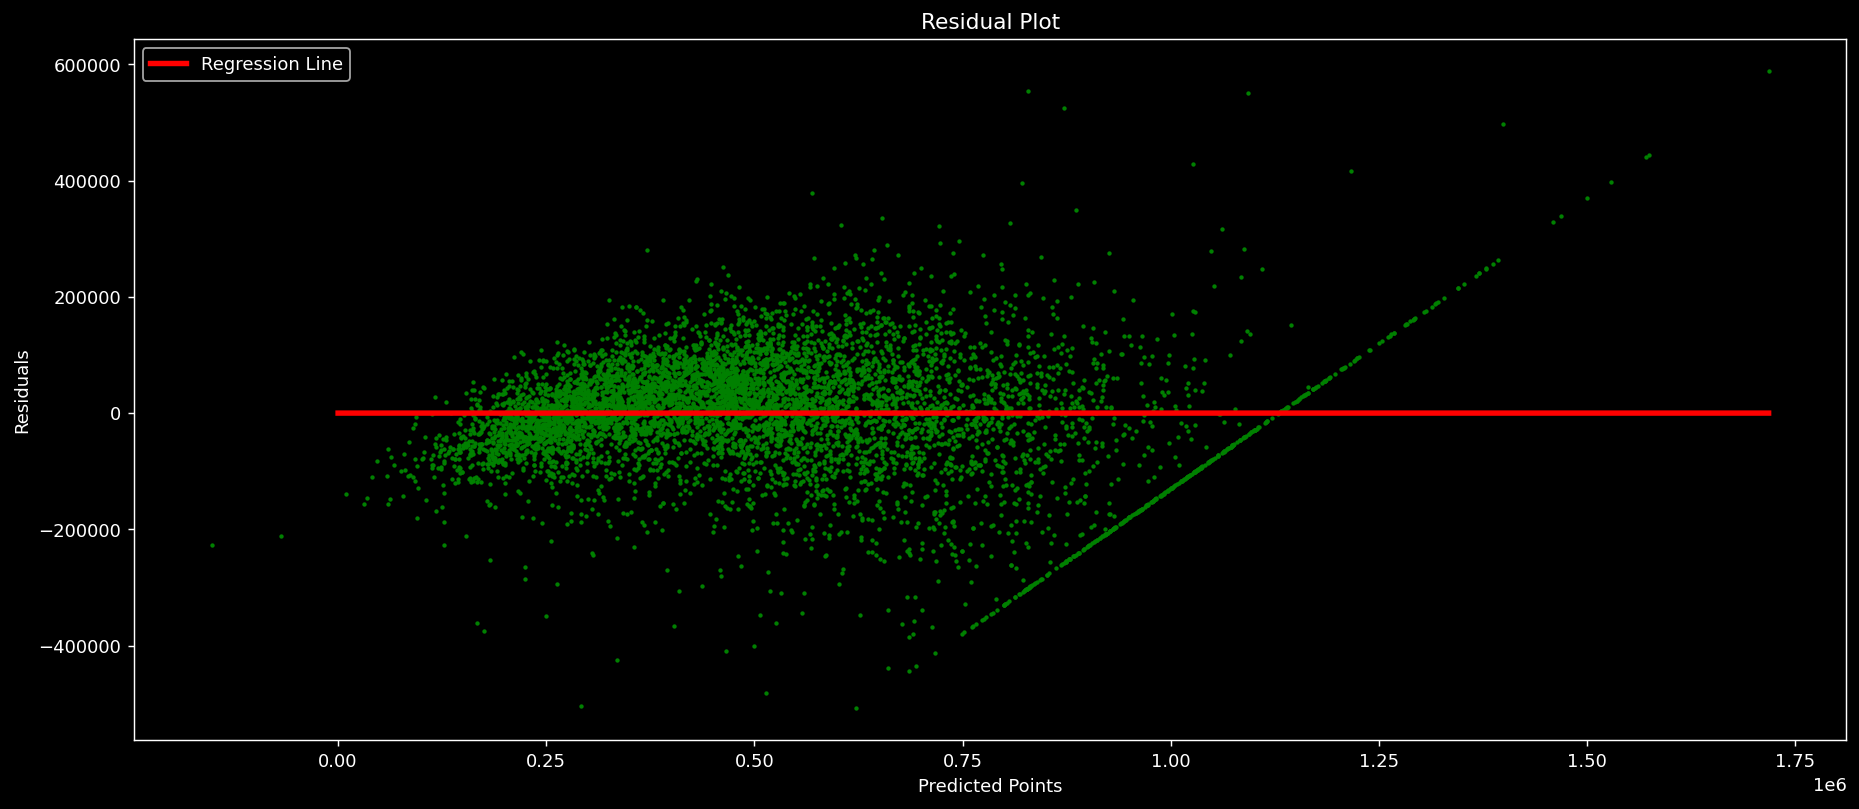

In [182]:
plt.figure(dpi=130,figsize=(17,7))

plt.scatter(residual_table['predictions'],residual_table['residuals'],color='green',s=2)
plt.plot(z,k,color='red',linewidth=3,label='Regression Line')
plt.xlabel('Predicted Points')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

# DISTRIBUTION OF ERRORS

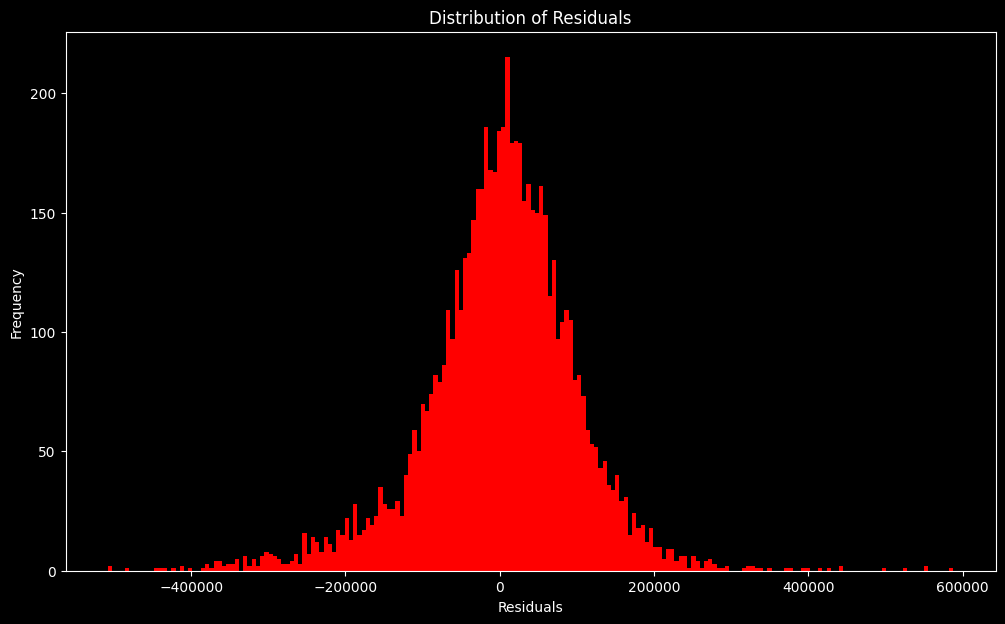

In [183]:
plt.figure(dpi=100,figsize=(12,7))
plt.hist(residual_table['residuals'],color='red',bins=200)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

# MODEL COEFFICIENTS

In [184]:
coefficients_table=pd.DataFrame({'column':x_train.columns,
                                 'coefficient':lr.coef_})
coefficients_table=coefficients_table.sort_values(by='coefficient')

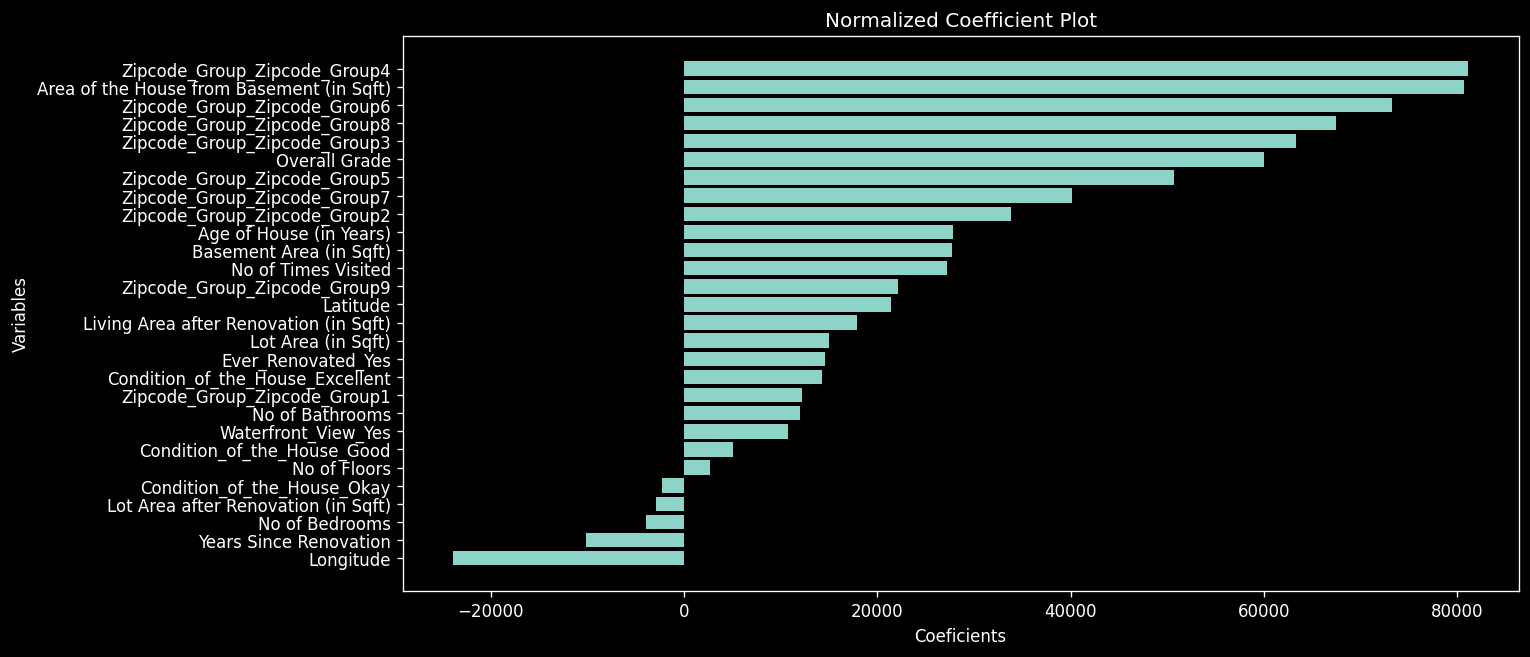

In [185]:
plt.figure(dpi=120,figsize=(12,6))
plt.barh(coefficients_table['column'],coefficients_table['coefficient'])
plt.xlabel('Coeficients')
plt.ylabel('Variables')
plt.title('Normalized Coefficient Plot')
plt.show()